<a href="https://colab.research.google.com/github/carrieacheung/rory-gilmore-booklist-analysis/blob/main/RG_booklist_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
# Import necessary libraries

import pandas as pd
from collections import Counter
import plotly.express as px
from statistics import mean
import numpy as np
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

# Load the data from a file in the Google drive



In [ ]:
# Load the csv file containing the Rory Gilmore booklist data as a pandas dataframe

RG_df = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/Rory Gilmore Book List/goodreads_data.csv', index_col=0, dtype = str)  

# Display the dataframe

In [ ]:
# Display a section of the dataframe

RG_df

,Title,Author(s),Number in Series,Series Title,Length of Series,Publication Month,Publication Day,Publication Year,Number of Pages,Genres,...,Rating,Number of Ratings,Number of 5-Star Ratings,Number of 4-Star Ratings,Number of 3-Star Ratings,Number of 2-Star Ratings,Number of 1-Star Ratings,Number of Reviews,Cover Image Tag,Synopsis
0,1984,George Orwell,NaN,NaN,NaN,April,8,1949,298,NaN,...,4.19,3820332,1806702,1242757,544887,147075,78911,89015,https://i.gr-assets.com/images/S/compressed.ph...,"Among the seminal texts of the 20th century,Ni..."
1,Absolute Rage,Robert K. Tanenbaum,14,Butch Karp,29,August,13,2002,480,"Mystery, Fiction, Legal Thriller, Thriller, My...",...,4.04,1012,342,414,215,35,6,62,https://i.gr-assets.com/images/S/compressed.ph...,New York Timesbestselling author Robert K. Tan...
2,The Age of Innocence,"Edith Wharton, James Zimmerhoff",NaN,NaN,NaN,October,19,1920,293,"Classics, Fiction, Historical Fiction, Romance...",...,3.96,154799,52610,57180,33799,8321,2889,8338,https://i.gr-assets.com/images/S/compressed.ph...,"Winner of the 1921 Pulitzer Prize,The Age of I..."
3,The Adventures of Huckleberry Finn,Mark Twain,2,Adventures of Tom and Huck,4,December,18,1884,327,"Classics, Fiction, Historical Fiction, Literat...",...,3.82,1210766,368888,417312,301667,89262,33637,17439,https://i.gr-assets.com/images/S/compressed.ph...,A nineteenth-century boy from a Mississippi Ri...
4,The Adventures of Tom Sawyer,Mark Twain,1,Adventures of Tom and Huck,4,June,18,1876,244,"Classics, Fiction, Adventure, Young Adult, His...",...,3.92,847233,278245,305825,196463,48334,18366,11787,https://i.gr-assets.com/images/S/compressed.ph...,The Adventures of Tom Sawyer revolves around t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,The Hound of the Baskervilles,Arthur Conan Doyle,5,Sherlock Holmes,9,September,1,1901,256,"Classics, Mystery, Fiction, Crime, Detective, ...",...,4.13,301092,116513,119511,54564,8324,2180,10040,https://i.gr-assets.com/images/S/compressed.ph...,Could the sudden death of Sir Charles Baskervi...
542,The Return of Sherlock Holmes,Arthur Conan Doyle,6,Sherlock Holmes,9,January,1,1904,455,"Classics, Mystery, Fiction, Short Stories, Cri...",...,4.29,59209,27952,21925,8030,958,344,1828,https://i.gr-assets.com/images/S/compressed.ph...,"'Holmes,' I cried. 'Is it really you? Can it i..."
543,The Valley of Fear,Arthur Conan Doyle,7,Sherlock Holmes,9,February,27,1915,96,"Mystery, Classics, Fiction, Crime, Detective, ...",...,3.97,40324,12860,15925,9494,1657,388,2337,https://i.gr-assets.com/images/S/compressed.ph...,Doyle's final novel featuring the beloved sleu...
544,His Last Bow,Arthur Conan Doyle,8,Sherlock Holmes,9,October,22,1917,242,"Mystery, Classics, Fiction, Short Stories, Cri...",...,4.26,41852,19899,14409,6268,936,340,1167,https://i.gr-assets.com/images/S/compressed.ph...,"'His Last Bow', the title story of this collec..."


# Exploratory Data Analysis

## Define all of the series' 

In [ ]:
# Define all of the series' that will be used from the dataframe

titles = RG_df['Title'].dropna()
authors = RG_df['Author(s)'].dropna()
num_in_series = RG_df['Number in Series'].dropna().astype('int64')
series_title = RG_df['Series Title'].dropna()
series_length = RG_df['Length of Series'].dropna().astype('int64')
publication_month = RG_df['Publication Month'].dropna()
publication_day = RG_df['Publication Day'].dropna()
publication_year = RG_df['Publication Year'].dropna().astype('int64')
num_pages = RG_df['Number of Pages'].dropna().astype('int64')
genres = RG_df['Genres'].dropna()
ratings = RG_df['Rating'].dropna().astype('float64')
num_ratings = RG_df['Number of Ratings'].dropna().astype('int64')
num_5_star = RG_df['Number of 5-Star Ratings'].dropna().astype('int64')
num_4_star = RG_df['Number of 4-Star Ratings'].dropna().astype('int64')
num_3_star = RG_df['Number of 3-Star Ratings'].dropna().astype('int64')
num_2_star = RG_df['Number of 2-Star Ratings'].dropna().astype('int64')
num_1_star = RG_df['Number of 1-Star Ratings'].dropna().astype('int64')
num_reviews = RG_df['Number of Reviews'].dropna().astype('int64')

## Simple breakdown of the books

Displays

* The count of each column
* How many uniique items in each column
* The item with the highest frequency in each column
* The frequency of the top item
* The dataframes shape

In [ ]:
# Simple breakdown of the books 

# Deterines the number of books in the booklist
num_books = len(RG_df)

# Gets descriptive statistics from the dataframe
RG_df.describe()

,Title,Author(s),Number in Series,Series Title,Length of Series,Publication Month,Publication Day,Publication Year,Number of Pages,Genres,...,Rating,Number of Ratings,Number of 5-Star Ratings,Number of 4-Star Ratings,Number of 3-Star Ratings,Number of 2-Star Ratings,Number of 1-Star Ratings,Number of Reviews,Cover Image Tag,Synopsis
count,546,542,135,134,148,279,538,525,532,471,...,546,546,546,546,546,546,546,546,546,532
unique,545,405,16,81,23,12,38,179,321,463,...,127,539,530,525,524,492,453,492,540,532
top,Inferno,William Shakespeare,1,Sherlock Holmes,3,January,19,2003,400,"Classics, Historical Fiction, Childrens, Ficti...",...,3.91,43,0,1,0,0,0,1,https://s.gr-assets.com/assets/nophoto/book/bl...,"Among the seminal texts of the 20th century,Ni..."
freq,2,14,69,9,31,40,184,28,9,3,...,16,2,5,5,5,13,13,8,7,1


Table Summary

* 546 books in the Rory Gilmore booklist
* 21 columns containing book data

## Analysis of book titles

Display a wordcloud from the book titles to see the most frequent words

In [ ]:
def clean_text(series):
  '''
  Clean the series by removing all words contained in the defined removal list

  [Args]
  :series: {pandas series} (n,) A selected series from the pandas dataframe

  [Returns]
  :cleaned_series: {pandas series} (n,) The cleaned series with all of the unwanted text removed
  '''

  # Creates a list of words that will be removed from the text
  stop_words = ["ourselves", "hers", "between", "yourself", "but", "again", "there", "about", "once", 
                    "during", "out", "very", "having", "with", "they", "own", "an", "be", "some", "for", 
                    "do", "its", "yours", "such", "into", "of", "most", "itself", "other", "off", "is", 
                    "s", "am", "or", "who", "as", "from", "him", "each", "the", "themselves", "until", 
                    "below", "are", "we", "these", "your", "his", "through", "don", "nor", "me", "were", 
                    "her", "more", "himself", "this", "down", "should", "our", "their", "while", "above", 
                    "both", "up", "to", "ours", "had", "she", "all", "no", "when", "at", "any", "before", 
                    "them", "same", "and", "been", "have", "in", "will", "on", "does", "yourselves", "then", 
                    "that", "because", "what", "over", "why", "so", "can", "did", "not", "now", "under", "he", 
                    "you", "herself", "has", "just", "where", "too", "only", "myself", "which", "those", "i", 
                    "after", "few", "whom", "t", "being", "if", "theirs", "my", "against", "a", "by", "doing", 
                    "it", "how", "further", "was", "here", "than"]
  contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                      "can't": "cannot","can't've": "cannot have",
                      "'cause": "because","could've": "could have","couldn't": "could not",
                      "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                      "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                      "hasn't": "has not","haven't": "have not","he'd": "he would",
                      "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                      "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                      "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                      "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                      "it'd": "it would","it'd've": "it would have","it'll": "it will",
                      "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                      "mayn't": "may not","might've": "might have","mightn't": "might not", 
                      "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                      "mustn't've": "must not have", "needn't": "need not",
                      "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                      "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                      "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                      "she'll": "she will", "she'll've": "she will have","should've": "should have",
                      "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                      "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                      "there'd've": "there would have", "they'd": "they would",
                      "they'd've": "they would have","they'll": "they will",
                      "they'll've": "they will have", "they're": "they are","they've": "they have",
                      "to've": "to have","wasn't": "was not","we'd": "we would",
                      "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                      "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                      "what'll've": "what will have","what're": "what are", "what've": "what have",
                      "when've": "when have","where'd": "where did", "where've": "where have",
                      "who'll": "who will","who'll've": "who will have","who've": "who have",
                      "why've": "why have","will've": "will have","won't": "will not",
                      "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                      "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                      "y'all'd've": "you all would have","y'all're": "you all are",
                      "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                      "you'll": "you will","you'll've": "you will have", "you're": "you are",
                      "you've": "you have"}
  contractions = list(contractions_dict.keys()) 
  expanded_contractions = ' '.join(list(contractions_dict.values()), ).split(' ')
  all_removed_words = stop_words + contractions + expanded_contractions 
  unique_removed_words = list(Counter(all_removed_words).keys())

  # Removes all of the words in the removal list from the text
  cleaned_series = []
  for element in series:
    element_words = element.split(' ')
    cleaned_element = []
    for word in element_words:
      if word.lower() not in unique_removed_words:
        cleaned_element.append(word)
    cleaned_element = ' '. join(cleaned_element)
    cleaned_element = cleaned_element.translate(str.maketrans('', '', string.punctuation)) # remove all punctuation from the string
    cleaned_series.append(cleaned_element)
  cleaned_series = pd.Series(cleaned_series) 
  return cleaned_series

In [ ]:
def convert_series_to_string(series):
  '''
  Combine a series of strings into a single string

  [Args]
  :series: {pandas series} (n,) A selected series from the pandas dataframe

  [Returns]
  :string: {string} The string created from combining all of the string elements in the series together
  '''
  string = ''
  for element in series:
    string = string + element + ' '
  return string

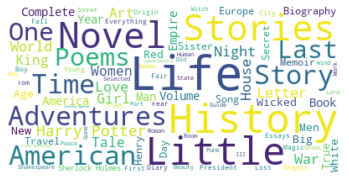

In [ ]:
# Create a wordcloud from words in the title

# Clean and format the titles for the wordcloud
cleaned_titles_series = clean_text(titles)
titles_string = convert_series_to_string(cleaned_titles_series)

# Generate the wordcloud image
wordcloud = WordCloud(background_color="white").generate(titles_string)

# Display the wordcloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Analysis of authors

Determine the top authors from the Rory Gilmore booklist

In [ ]:
def sort_counter(series):
  '''
  Sort the elements in a series by frequency and save the data into a pandas dataframe

  [Args]
  :series: {pandas series} (n,) A selected series from the pandas dataframe

  [Returns]
  :sorted_df: {pandas dataframe} (n, 2) Dataframe with the elements sorted by their frequency
  '''
  counter_dict = Counter(series)
  dict_keys = list(counter_dict.keys())
  dict_values = list(counter_dict.values())
  df_dict = {'Keys': dict_keys, 'Count': dict_values}
  sorted_df = pd.DataFrame(df_dict).sort_values(by=['Count'])
  return sorted_df

In [ ]:
def find_keys_match_all(keys, keys_series, match_series):
  '''
  Find all of the elements in the match series that are in the same row as the keys in the keys series

  [Args]
  :keys: {list} A list containg the keys that you want to find the match for
  :keys_series: {pandas series} (n,) A selected series from the pandas dataframe that contains the keys as elements
  :match_series: {pandas series} (n,) A selected series from the pandas dataframe that contains the matches for the keys

  [Returns]
  :matches: {list} A list of strings, where each sting is the matche to a key
  '''
  matches = []
  for key in keys:
    match = match_series[keys_series[keys_series == key].index[:]].values
    try:
      match = ', '.join(match)
    except:
      pass
    matches.append(match)
  return matches

In [ ]:
def format_hover_text(list_of_strings):
  '''
  Formats all the strings in a list so that they are displayed as hover text in a graph or chart correctly

  [Args]
  :list_of_strings: {list} A list of strings that list items

  [Returns]
  :formatted_string: {list} A list of strings formatted to display as hover text correctly
  '''
  formatted_list = []
  for string in list_of_strings:
    formatted_string = string.replace(', ', '<br>')
    formatted_list.append(formatted_string)
  return formatted_list

In [ ]:
# Create a bar chart for the top  authors

# Collect data on the top authors, the number of books they've published and the titles of those books 
sorted_authors_df = sort_counter(authors)
top_authors_df = sorted_authors_df.tail(10)
books_from_top_authors = find_keys_match_all(top_authors_df['Keys'], authors, titles)
books_from_top_authors_formatted = format_hover_text(books_from_top_authors)

# Display the bar chart
fig = px.bar(top_authors_df,
             y='Keys', 
             x='Count',
             custom_data=[books_from_top_authors_formatted],
             title='Top Authors in the Rory Gilmore Booklist',
             orientation='h')
fig.update_traces(hovertemplate='<br>'.join(['Book Count = %{x}',
                                             'Author = %{y}',
                                             'Titles = %{customdata[0]}']))
fig.update_layout(xaxis={'title': 'Book Count'},
                  yaxis={'title': 'Authors'},
                  showlegend=False)
fig.show()

## Analysis of book series

Determine of breakdown of book that are in a series and books that are standalones

In [ ]:
# Create a pie chart showing the breakdown of standalones vs series

# Collect data 
books_in_series = len(series_title)
standalones = num_books - books_in_series
sorted_series_df = sort_counter(series_title)
length_matches = find_keys_match_all(sorted_series_df['Keys'], series_title, series_length) # Get series lengths
series_lengths = []
for length in length_matches:
  series_lengths.append(length[0])
sorted_series_df['Length'] = series_lengths
title_matches = find_keys_match_all(sorted_series_df['Keys'], series_title, titles) # Get book titles from series
title_matches = format_hover_text(title_matches)
standalone_row = {'Keys': 'Standalones', 'Count': standalones, 'Length': None}
series_standalones_df = sorted_series_df.append(standalone_row, ignore_index = True)

# Display a pie chart of the data
fig = px.pie(series_standalones_df, 
             values='Count', 
             names='Keys',
             custom_data=['Length'],
             title='Breakdown of Standalones vs Series in the Rory Gilmore Booklist')
fig.update_traces(textposition='inside', 
                  textinfo='percent+label',
                  text=title_matches,
                  hovertemplate='<br>'.join(['Series Title = %{label}',
                                             '# Books in Booklist = %{value}',
                                             'Series Length = %{customdata[0]}',
                                             'Titles = %{text}']))
fig.show()

Chart Summary

* 412 standalones
* 134 books in 81 different series 
* 7 complete series: Angels in America, Robert Langdon, La Divina Commedia, Harry Potter, The Last Lion, The Deptford Trilogy and Sherlock Holmes 

## Analysis of publication dates

Look at trends for when the books in the Rory Gilmore booklist were published

### Month of publication

In [ ]:
# Plot a bar chart showing how many books from the Rory Gilmore book list were published in each month

# Create dataframe to plot
months_df = sort_counter(publication_month)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_df['Keys'] = pd.Categorical(months_df['Keys'], categories=months, ordered=True)
months_df.sort_values(by='Keys', inplace=True)
mean_publications = mean(months_df['Count'])
unknown = num_books - len(publication_month)
unknown_row = {'Keys': 'Unknown', 'Count': unknown}
months_df = months_df.append(unknown_row, ignore_index = True)
labels = ['Month', 'Month', 'Month', 'Month', 'Month', 'Month', 'Month', 'Month', 'Month', 'Month', 'Month', 'Month', 'Unknown']
months_df['Labels'] = labels

# Plot figure
fig = px.bar(months_df,
             y='Count', 
             x='Keys',
             title='Book Publications by Month',
             color='Labels',
             color_discrete_map = {'Month': 'steelblue', 
                                   'Unknown' : 'grey'})
fig.update_traces(hovertemplate='Month = %{x}<br># of Publications = %{y}<extra></extra>')
fig.update_layout(xaxis={'title': 'Months'},
                  yaxis={'title': 'Number of Publications'},
                  showlegend=False)
fig.add_hline(y=mean_publications, 
              line_width=3, 
              line_dash="dash", 
              line_color="green", 
              annotation_text=f"Mean: {mean_publications} publications", 
              annotation_position="top right")
fig.show()

Table Summary

* Of the 546 books, 279 provided a publication month
* The average number of publications across all of the months was 23.25 publications
* January had the highest number of publications, with 40
* December had the lowest number of publications, with 12

### Year of publication

In [ ]:
# Plot a histogram showing how many books from the Rory Gilmore book list were published in each month

# Gather the data on publication year
years_df = sort_counter(publication_year)
yearly_mean = round(mean(years_df['Count']), 2)

# Plot the data as a histogram
fig = px.histogram(years_df,
                   y='Count',
                   x='Keys',
                   title='Book Publications per Year',
                   range_x=[1300, 2022],
                   nbins=722)
fig.update_traces(hovertemplate='Year = %{x}<br># of Publications = %{y}<extra></extra>')
fig.update_layout(xaxis={'title': 'Year'},
                  yaxis={'title': 'Number of Publications'})
fig.add_hline(y=yearly_mean, 
              line_width=3, 
              line_dash="dash", 
              line_color="green", 
              annotation_text=f"Mean: {yearly_mean} publications", 
              annotation_position="top left")
fig.show()

## Analysis of Book Pages

In [ ]:
# Plot a histogram showing the number of pages in the books

# Collect the data on the number of pages
num_pages_df = sort_counter(num_pages)
mean_num_of_pages = round(mean(num_pages_df['Keys']), 2)
shortest = min(num_pages_df['Keys'])
shortest_books = find_keys_match_all([shortest], num_pages, titles)
longest = max(num_pages_df['Keys'])
longest_books = find_keys_match_all([longest], num_pages, titles)

# Plot the data as a histogram
fig = px.histogram(num_pages_df,
                   y='Count',
                   x='Keys',
                   title='Number of Book Pages')
fig.update_traces(hovertemplate='# Pages = %{x}<br># of Publications = %{y}<extra></extra>')
fig.update_layout(xaxis={'title': 'Number of Pages'},
                  yaxis={'title': 'Number of Publications'})
fig.add_vline(x=mean_num_of_pages, 
              line_width=3, 
              line_dash="dash", 
              line_color="green", 
              annotation_text=f"Mean: {mean_num_of_pages} pages", 
              annotation_position="top right")
fig.show()

Graph Summary

* 432.79 is the mean number of pages for all the books
* Sonnet 43 (How Do I Love Thee?) is the shortest book, with 1 page
* The Norton Anthology of Theory and Criticism is the longest book, with 2,662 pages

## Analysis of Genres

Each book is classified under multiple genres, with the genres listed first being the most relevent

In [ ]:
# Create a pie chart showing the breakdown of genres in the booklist

# Gather data on the genres
all_genres = ', '.join(list(genres)).split(', ')
genres_df = sort_counter(all_genres)

# Plot a pie chart showing the breakdown of genres
fig = px.pie(genres_df, 
             values='Count', 
             names='Keys',
             title='Breakdown of Genres in the Rory Gilmore Book List')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Analysis of Ratings

In [ ]:
# Create a histogram showing the ratings of the books

# Collect rating data
mean_rating = round(mean(ratings), 2)
lowest_rating = min(ratings)
lowest_rated_books = find_keys_match_all([lowest_rating], ratings, titles)
lowest_rated_authors = find_keys_match_all([lowest_rating], ratings, authors)
highest_rating = max(ratings)
highest_rated_books = find_keys_match_all([highest_rating], ratings, titles)
highest_rated_authors = find_keys_match_all([highest_rating], ratings, authors)

# Plot a histogram of the ratings
fig = px.histogram(x=ratings,
                   title='Ratings across all books',
                   range_x=[0, 5])
fig.update_traces(hovertemplate='Rating = %{x} stars<br># of Publications = %{y}<extra></extra>')
fig.update_layout(xaxis={'title': 'Rating'},
                  yaxis={'title': 'Number of Publications'})
fig.add_vline(mean_rating, 
              line_width=3, 
              line_dash="dash", 
              line_color="green", 
              annotation_text=f"Mean: {mean_rating} stars", 
              annotation_position="top right")
fig.show()

Summary Ratings Graph

* 3.93/5.00 stars is the mean rating
* The lowest rated books are Orations of American Orators: Including Biographical and Critical Sketches by Julian Hawthorne and Say Goodbye to Daisy Miller by Henry James, with 0.00/5.00 stars
* The highest rated book is Downpour by Nick Holmes, with 5.00/5.00 stars

In [ ]:
# Create a bar chart showing the number of ratings for all of the books

# Collect the number of ratings data
most_ratings = max(num_ratings)
most_ratings_books = find_keys_match_all([most_ratings], num_ratings, titles)
most_ratings_author = find_keys_match_all([most_ratings], num_ratings, authors)
most_5_ratings = max(num_5_star)
most_5_ratings_books = find_keys_match_all([most_5_ratings], num_5_star, titles)
most_5_ratings_author = find_keys_match_all([most_5_ratings], num_5_star, authors)
most_1_ratings = max(num_1_star)
most_1_ratings_books = find_keys_match_all([most_1_ratings], num_1_star, titles)
most_1_ratings_author = find_keys_match_all([most_1_ratings], num_1_star, authors)

# Plot the bar chart
star_count = [sum(num_5_star), sum(num_4_star), sum(num_3_star), sum(num_2_star), sum(num_1_star)]
star_label = ['5 Star', '4 Star', '3 Star', '2 Star', '1 Star']
fig = px.bar(x=star_count, 
             y=star_label, 
             orientation='h',
             title='Number of ratings across all books')
fig.update_layout(xaxis={'title': 'Number of Ratings'},
                  yaxis={'title': 'Ratings'})
fig.show()

Summary of Bar Chart 

* Harry Potter and the Sorcerer's Stone by J.K. Rowling has the most overall ratings, with 8,516,941 ratings, and the most 5 star ratings, with 5,537,066 ratings
* The Catcher in the Rye by J.D. Salinger has the most 1 star ratings, with 157,595 ratings

## Analysis of Reviews

In [ ]:
# Analysis of Number of Reviews

# Collect review data
mean_review = round(mean(num_reviews), 2)
least_reviewed = min(num_reviews)
least_reviewed_books = find_keys_match_all([least_reviewed], num_reviews, titles)
least_reviewed_authors = find_keys_match_all([least_reviewed], num_reviews, authors)
most_reviewed = max(num_reviews)
most_reviewed_books = find_keys_match_all([most_reviewed], num_reviews, titles)
most_reviewed_authors = find_keys_match_all([most_reviewed], num_reviews, authors)

# Plot a histogram of the num_reviews
fig = px.histogram(x=num_reviews,
                   title='Number of reviews for all of the books')
fig.update_traces(hovertemplate='# of Reviews = %{x} reviews<br># of Publications = %{y}<extra></extra>')
fig.update_layout(xaxis={'title': 'Number of Reviews'},
                  yaxis={'title': 'Number of Publications'})
fig.add_vline(mean_review, 
              line_width=3, 
              line_dash="dash", 
              line_color="green", 
              annotation_text=f"Mean: {mean_review} reviews", 
              annotation_position="top right")
fig.show()

Summary of Review Graph

* 9,389.55 was the mean number of reviews
* Goodnight Spoons by Keith Richards, Orations of American Orators: Including Biographical and Critical Sketches by Julian Hawthorne, Pomeranian: An Owner's Guide to a Happy Healthy Pet by Happeth A. Jones and Say Goodbye to Daisy Miller by Henry James had the lowest number of reviews, with 0 reviews
* Gone Girl by Gillian Flynn had the highest number of reviews, with 140,475 reviews